In [3]:
import wfdb
print(wfdb.__version__)

4.3.0


In [4]:
import wfdb
wfdb.dl_database('mitdb', dl_dir='mitdb_data', records=['100'], annotators=['atr'], keep_subdirs=True, overwrite=False)

Generating record list for: 100
Generating list of all files for: 100
Created local base download directory: mitdb_data
Finished downloading files


In [6]:
record = wfdb.rdrecord('mitdb_data/100')  # o según ruta
annotation = wfdb.rdann('mitdb_data/100', 'atr')

In [7]:
record = wfdb.rdrecord('100', pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

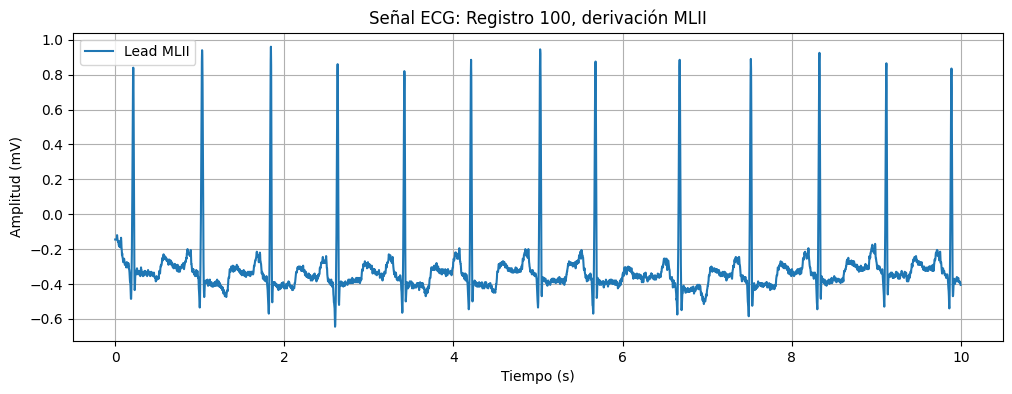

In [8]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el registro (por ejemplo “100” de MIT-BIH)
record = wfdb.rdrecord('mitdb/100', pn_dir='mitdb')  
# Alternativamente si ya lo tienes descargado localmente, usar la ruta local:
# record = wfdb.rdrecord('ruta/a/100')

signal = record.p_signal    # array con muestras de señal
fs = record.fs               # frecuencia de muestreo
sig_names = record.sig_name  # nombres de las derivaciones

# 2. Definir un tramo a graficar (por ejemplo los primeros 10 segundos)
duration_sec = 10
n_samples = duration_sec * fs

time_axis = np.arange(n_samples) / fs

# 3. Seleccionar la derivación que quieres graficar, por ejemplo la primera
lead_index = 0
lead_signal = signal[:n_samples, lead_index]

# 4. Graficar
plt.figure(figsize=(12,4))
plt.plot(time_axis, lead_signal, label=f"Lead {sig_names[lead_index]}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")  # dependiendo de la unidad del dataset
plt.title(f"Señal ECG: Registro 100, derivación {sig_names[lead_index]}")
plt.legend()
plt.grid(True)
plt.show()